In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/ZoeZhouJ/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

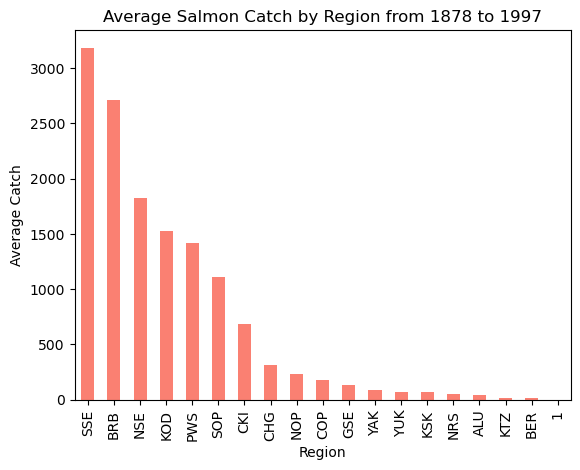

In [3]:
# FINAL CODE

# Import packages
import pandas as pd
import numpy as np

# Set to display all columns
pd.set_option('display.max_columns', None)

# Import data from path
catch_data = pd.read_csv('data/salmon_data.csv')

# Drop the column and update dataframe
catch_data = catch_data.drop(columns='notesRegCode')

# Update the value of I to 1 with at[]
catch_data[catch_data['Catch'] == 'I'] = 1

# Update Catch column to be of type int64
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Create a data frame with average catch per region
avg_region = (catch_data.groupby('Region') # Split the data into region
                         .Catch # Select columns to perform summary statistic
                         .mean() # Calculate summary statistic
                         .rename('mean_catch') # Rename column according to updated values
                         .sort_values(ascending =False) # Sort result in descending order
).plot(kind='bar', # Specify bar graph
                             title = 'Average Salmon Catch by Region from 1878 to 1997', 
                             color = 'Salmon', 
                             ylabel = 'Average Catch'
)



## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [2]:
# a.Import data from directory
catch_data = pd.read_csv('data/salmon_data.csv')
# Check head of the dataframe
catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [3]:
# b. 
# Check types of variables in catch_data
catch_data.dtypes

Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object

In [4]:
# Count number of distinct elements in specified axis
catch_data.nunique()

Region            18
Year             120
notesRegCode      29
Species            5
Catch           1879
dtype: int64

In [5]:
# Print a concise summary of catch_data
catch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        8540 non-null   object
 1   Year          8540 non-null   int64 
 2   notesRegCode  1415 non-null   object
 3   Species       8540 non-null   object
 4   Catch         8540 non-null   object
dtypes: int64(1), object(4)
memory usage: 333.7+ KB


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I printed data type of all columns within catch_data using `dtypes`, and found out that the 'Catch' column is an object instead of int64. I also counted number of distinct elements in specified columns and found out that there are a total of 18 distinct regions. 

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [6]:
# Call unique values of 'notesRegCode' and assign to a variable
notes_unique = catch_data['notesRegCode'].unique()
# Print variable 
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [7]:
# Drop the column and update dataframe
catch_data = catch_data.drop(columns='notesRegCode')
# Verify notesRegCode column is no longer in the dataframe
catch_data.columns

Index(['Region', 'Year', 'Species', 'Catch'], dtype='object')

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


_Catch column would make more sense as int64 instead of object. Year column could also benefit from being a datetime64_

In [8]:
# Check types of variables in catch_data
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [9]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [10]:
# Find the rows that have 'I' in catch column and store to a variable
catch_I = catch_data[catch_data['Catch'] == 'I']
# Check the filtered row
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [11]:
# Update the value of I to 1 with at[]
catch_data.at[400, 'Catch'] = 1
# catch_data[catch_data['Catch'] == 'I'] = 1
# Access row #400 to verify change
catch_1 = catch_data.iloc[400]
# Display output
catch_1

Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [12]:
# Update Catch column to be of type int64
catch_data['Catch'] = catch_data['Catch'].astype('int64')

In [13]:
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch       int64
dtype: object

In [14]:
# Store the type of the column as a variable
catch_column_type = catch_data['Catch'].dtypes
# Display result
catch_column_type

dtype('int64')

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [15]:
# Create a data frame with average catch per region
avg_region = (catch_data.groupby('Region') # Split the data into region
                         .Catch # Select columns to perform summary statistic
                         .mean() # Calculate summary statistic
                         .rename('mean_catch') # Rename column according to updated values
                         .sort_values(ascending =False) # Sort result in descending order
)
avg_region

Region
SSE    3184.660714
BRB    2709.796491
NSE    1825.020870
KOD    1528.350000
PWS    1419.236697
SOP    1110.942222
CKI     683.571429
CHG     315.487273
NOP     229.493478
COP     179.223404
GSE     133.841463
YAK      91.922917
YUK      68.645570
KSK      67.642353
NRS      51.502703
ALU      40.383908
KTZ      18.836145
BER      16.372549
Name: mean_catch, dtype: float64

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<AxesSubplot:title={'center':'Average Salmon Catch by Region from 1878 to 1997'}, xlabel='Region', ylabel='Average Catch'>

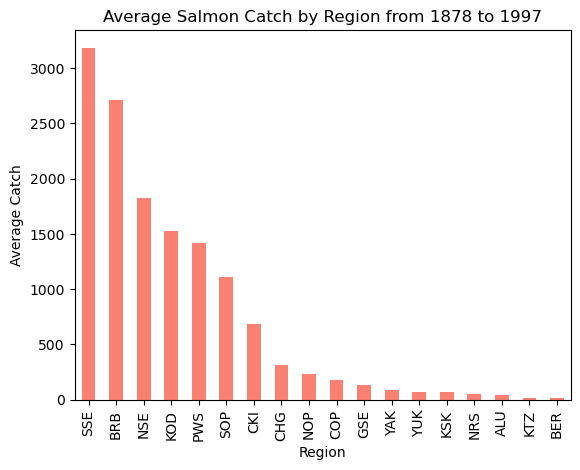

In [16]:
# create a plot 
(avg_region.plot(kind='bar', # Specify bar graph
                 title = 'Average Salmon Catch by Region from 1878 to 1997', 
                 color = 'Salmon', 
                 ylabel = 'Average Catch'
)
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

The bar chart illustrates the regional disparities in average salmon catch from 1878 to 1997. It is evident that regions like Southern Southeast Alaska (SSE) and Bristol Bay Management Area (BRB) had the highest average catches, while areas such as Kotzebue Management area (KTZ) and Bering River Subarea Copper River Subarea (BER) had significantly lower average. 

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).